<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week05_PolynomialRegression_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5
# <font color="green">Polynomial Regression</font>
**Polynomial regression** extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power.

### <font color="green">Polynomial Regression with One Feature</font>
- Model Assumption: 
$$\hat{Y} =  \theta_0 + \theta_1X + \theta_2X^2 + \cdots + \theta_d X^d$$
- Least Squares Cost Function:
$$MSE(\theta) = \frac{1}{N}\sum_{i=1}^N(\theta_0 + \theta_1x^{(i)} + \cdots + \theta_d(x^{(i)})^d - y^{(i)})^2 = \frac{1}{N}(\textbf{X}\theta - \textbf{y})^T(\textbf{X}\theta - \textbf{y})$$

    \begin{equation}
    \textbf{X} = \begin{pmatrix}
    1 & x^{(1)} & (x^{(1)})^2 & \cdots & (x^{(1)})^d \\
    1 & x^{(2)} & (x^{(2)})^2 & \cdots & (x^{(2)})^d \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x^{(N)} & (x^{(N)})^2 & \cdots & (x^{(N)})^d \\
    \end{pmatrix}, 
    \textbf{y}=\begin{pmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(N)}
    \end{pmatrix}
    \end{equation}
    
- Normal equation still applies:
$$
\theta = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
$$
- Simply put, polynomial regression is multilinear regression on $(X, X^2, ..., X^d)$.
- It is rarely necessary to consider $d>4$, since higher order terms make the polynomial overly flexible and tends to explode near the bounary.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
%matplotlib inline

As an exercise, let's build a polynomial model for Sales vs. TV budgets based on the advertising data.

In [2]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, usecols = ['TV', 'sales'])
advertising.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


Text(0, 0.5, 'Sales Revenue')

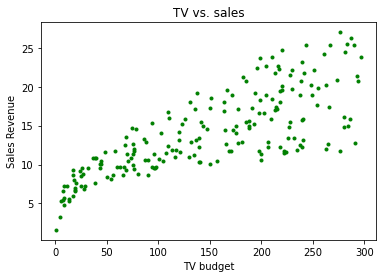

In [3]:
# plot TV vs. sales
plt.plot(advertising['TV'], advertising['sales'], 'g.')
plt.title("TV vs. sales")
plt.xlabel("TV budget")
plt.ylabel("Sales Revenue")

In [4]:
# Ex. Split the data into training_set (80%) and test_set (20%)
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(advertising, test_size=0.2)
print(training_set.shape)
print(test_set.shape)
training_set.head()

(160, 2)
(40, 2)


,TV,sales
67,139.3,13.4
150,280.7,16.1
108,13.1,5.3
12,23.8,9.2
30,292.9,21.4


In [18]:
# Let's build a polynomial model of degree 2.

# Create matrix X: np.ones(), DataFrame.values, np.hstack()
N = len(training_set)
col1 = np.ones([N, 1])
# print(col1)
col2 = training_set[['TV']].values
# col2 = np.array(training_set[['TV']])
# print(col2)
col3 = col2 ** 2
# col3 = (training_set[['TV']] ** 2).values
# print(col3)
X = np.hstack([col1, col2, col3])
# print(X)

# Create matrix y
y = training_set[['sales']].values
# print(y)

# Apply the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[[6.0567]
 [0.0676]
 [-0.0001]]


In [23]:
# Build a polynomial model using the LinearRegression class
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
tv_poly = poly_features.fit_transform(training_set[['TV']])
print(tv_poly) # tv_poly is the transformed training data

[[139.3000 19404.4900]
 [280.7000 78792.4900]
 [13.1000 171.6100]
 [23.8000 566.4400]
 [292.9000 85790.4100]
 [217.7000 47393.2900]
 [206.8000 42766.2400]
 [131.1000 17187.2100]
 [8.7000 75.6900]
 [149.8000 22440.0400]
 [204.1000 41656.8100]
 [94.2000 8873.6400]
 [163.3000 26666.8900]
 [170.2000 28968.0400]
 [5.4000 29.1600]
 [131.7000 17344.8900]
 [0.7000 0.4900]
 [120.5000 14520.2500]
 [261.3000 68277.6900]
 [66.1000 4369.2100]
 [239.8000 57504.0400]
 [11.7000 136.8900]
 [59.6000 3552.1600]
 [16.9000 285.6100]
 [109.8000 12056.0400]
 [38.0000 1444.0000]
 [193.2000 37326.2400]
 [218.4000 47698.5600]
 [116.0000 13456.0000]
 [76.3000 5821.6900]
 [89.7000 8046.0900]
 [287.6000 82713.7600]
 [69.2000 4788.6400]
 [177.0000 31329.0000]
 [199.8000 39920.0400]
 [43.0000 1849.0000]
 [191.1000 36519.2100]
 [149.7000 22410.0900]
 [253.8000 64414.4400]
 [281.4000 79185.9600]
 [210.7000 44394.4900]
 [273.7000 74911.6900]
 [262.7000 69011.2900]
 [147.3000 21697.2900]
 [210.8000 44436.6400]
 [265.600

In [24]:
# Train the polynomial model by training a linear model on the transformed data
from sklearn.linear_model import LinearRegression
model_pr = LinearRegression()
model_pr.fit(tv_poly, training_set['sales']) 

LinearRegression()

In [26]:
print(model_pr.intercept_, model_pr.coef_)

6.05670809711658 [0.0676 -0.0001]


6.05670809711658 0.06755393436668307 -6.752319239919022e-05
[0.0000 3.0000 6.0000 9.0000 12.0000 15.0000 18.0000 21.0000 24.0000
 27.0000 30.0000 33.0000 36.0000 39.0000 42.0000 45.0000 48.0000 51.0000
 54.0000 57.0000 60.0000 63.0000 66.0000 69.0000 72.0000 75.0000 78.0000
 81.0000 84.0000 87.0000 90.0000 93.0000 96.0000 99.0000 102.0000 105.0000
 108.0000 111.0000 114.0000 117.0000 120.0000 123.0000 126.0000 129.0000
 132.0000 135.0000 138.0000 141.0000 144.0000 147.0000 150.0000 153.0000
 156.0000 159.0000 162.0000 165.0000 168.0000 171.0000 174.0000 177.0000
 180.0000 183.0000 186.0000 189.0000 192.0000 195.0000 198.0000 201.0000
 204.0000 207.0000 210.0000 213.0000 216.0000 219.0000 222.0000 225.0000
 228.0000 231.0000 234.0000 237.0000 240.0000 243.0000 246.0000 249.0000
 252.0000 255.0000 258.0000 261.0000 264.0000 267.0000 270.0000 273.0000
 276.0000 279.0000 282.0000 285.0000 288.0000 291.0000 294.0000 297.0000
 300.0000]


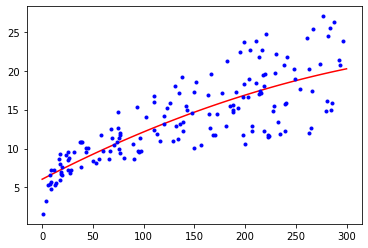

In [33]:
# Let's plot the polynomial curve with the data set.
# Y = theta0 + theta1 * X + theta2 * X ** 2
theta0 = model_pr.intercept_
theta1, theta2 = model_pr.coef_
print(theta0, theta1, theta2)

# x_coordinates = [0, 50, 100, 150, 200, 250, 300]
# We can use np.linspace to sample a large number of values from an interval
x_coordinates = np.linspace(0, 300, 101)
print(x_coordinates)
y_coordinates = []
for x in x_coordinates:
  y = theta0 + theta1 * x + theta2 * x ** 2
  y_coordinates.append(y)


plt.plot(x_coordinates, y_coordinates, "r-")
plt.plot(training_set['TV'], training_set['sales'], 'b.')

In [38]:
# Ex: Calculate the test MSE.
from sklearn.metrics import mean_squared_error
test_poly = poly_features.fit_transform(test_set[['TV']])
predictions = model_pr.predict(test_poly)
MSE = mean_squared_error(test_set['sales'], predictions)
print(MSE)

13.114101247862035


### <font color="green">Overfitting vs. Underfitting</font>
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171229/overfitting_1.png" width="600">
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" width="600">

How to detect model overfitting?
- Training error vs. test error
- Cross Validation
- Model visualization

### <font color="green">Preventing Model Overfitting</font>
- Get more training data
- Feature selection
- Regularization
- Early stopping

<img src="https://hackernoon.com/hn-images/1*vuZxFMi5fODz2OEcpG-S1g.png" width="600">